**30E03000 - Data Science for Business I (2019)**

# Assignment 2: Credit Risk Modeling (template)

## Import libraries

In [8]:
import pandas as pd #data frames (for storing data)
import numpy as np #scientific computing
import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.model_selection import train_test_split #Data split function
from sklearn.preprocessing import LabelEncoder #OneHotEncoding
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

#Decision tree plot
import pydotplus
from IPython.display import Image 

## Import data

In [2]:
#import the data into a Pandas dataframe and show it
data =pd.read_csv("credit.csv")
data.head(10).style

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIOTV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,COAPPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,1169,4,4,4,0,1,0,0,0,4,1,0,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,5951,0,2,2,0,0,0,0,0,2,1,0,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,2096,0,3,2,0,1,0,0,0,3,1,0,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,7882,0,3,2,0,1,0,0,1,4,0,0,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,4870,0,2,3,0,1,0,0,0,4,0,1,53,0,0,0,2,2,2,0,0,0
5,6,3,36,2,0,0,0,0,1,0,9055,4,2,2,0,1,0,0,0,4,0,1,35,0,0,0,1,1,2,1,0,1
6,7,3,24,2,0,0,1,0,0,0,2835,2,4,3,0,1,0,0,0,4,0,0,53,0,0,1,1,2,1,0,0,1
7,8,1,36,2,0,1,0,0,0,0,6948,0,2,2,0,1,0,0,0,2,0,0,35,0,1,0,1,3,1,1,0,1
8,9,3,12,2,0,0,0,1,0,0,3059,3,3,2,1,0,0,0,0,4,1,0,61,0,0,1,1,1,1,0,0,1
9,10,1,30,4,1,0,0,0,0,0,5234,0,0,4,0,0,1,0,0,2,0,0,28,0,0,1,2,3,1,0,0,0


## Data exploration

In [3]:
#Explore the data
#data.describe()
data.info() # With this it can be seen that there is no missing data and all variables have int values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
OBS#                1000 non-null int64
CHK_ACCT            1000 non-null int64
DURATION            1000 non-null int64
HISTORY             1000 non-null int64
NEW_CAR             1000 non-null int64
USED_CAR            1000 non-null int64
FURNITURE           1000 non-null int64
RADIOTV             1000 non-null int64
EDUCATION           1000 non-null int64
RETRAINING          1000 non-null int64
AMOUNT              1000 non-null int64
SAV_ACCT            1000 non-null int64
EMPLOYMENT          1000 non-null int64
INSTALL_RATE        1000 non-null int64
MALE_DIV            1000 non-null int64
MALE_SINGLE         1000 non-null int64
MALE_MAR_or_WID     1000 non-null int64
COAPPLICANT         1000 non-null int64
GUARANTOR           1000 non-null int64
PRESENT_RESIDENT    1000 non-null int64
REAL_ESTATE         1000 non-null int64
PROP_UNKN_NONE      1000 non-null int64
AGE           

## Data visualization

[700 300]


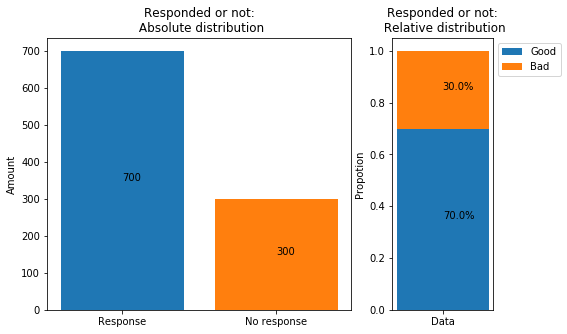

In [31]:
#Visualize 
one,zero = list(data["RESPONSE"]).count(1),list(data["RESPONSE"]).count(0) # amount of 1 and 0
lista = np.array([one,zero])
prop=lista/lista.sum()

print(lista)

fig = plt.figure(figsize=(8,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['Response', 'No response'], lista, color=['#1f77b4','#ff7f0e']) #left bar plot
ax0 = plt.title('Responded or not:\n Absolute distribution') 
ax0 = plt.ylabel('Amount')
ax0 = plt.text(['Response'], lista[0]/2, lista[0]) #add text box with count of non-fraudulent cases
ax0 = plt.text(['No response'], lista[1]/2, lista[1]) #add text box with count of fraudulent cases

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Data'], [prop[0]], label='Good')
ax1 = plt.bar(['Data'], [prop[1]], bottom=prop[0], label='Bad')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Responded or not:\n Relative distribution')
ax1 = plt.ylabel('Propotion')
ax1 = plt.text(['Data'],prop[0]/2, '{}%'.format((prop[0]*100).round(1)))
ax1 = plt.text(['Data'],(prop[1]/2)+prop[0], '{}%'.format((prop[1]*100).round(1)))


#plt.hist(zero)
plt.show()

## Data preprocessing

In [5]:
#Dropping OBS# (observation nr) as it is essentially just row nr and has no explanatory power
data = data.drop(['OBS#'], axis=1) #axis=1 drops a column (axis=0 drops a row)
data.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIOTV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,0


## Data split

In [6]:
X, y = data.loc[:, data.columns != 'RESPONSE'], data['RESPONSE'] #define feature matrix X and labels y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12345) #split data 70:30

## Build an (unbalanced) Decision Tree model

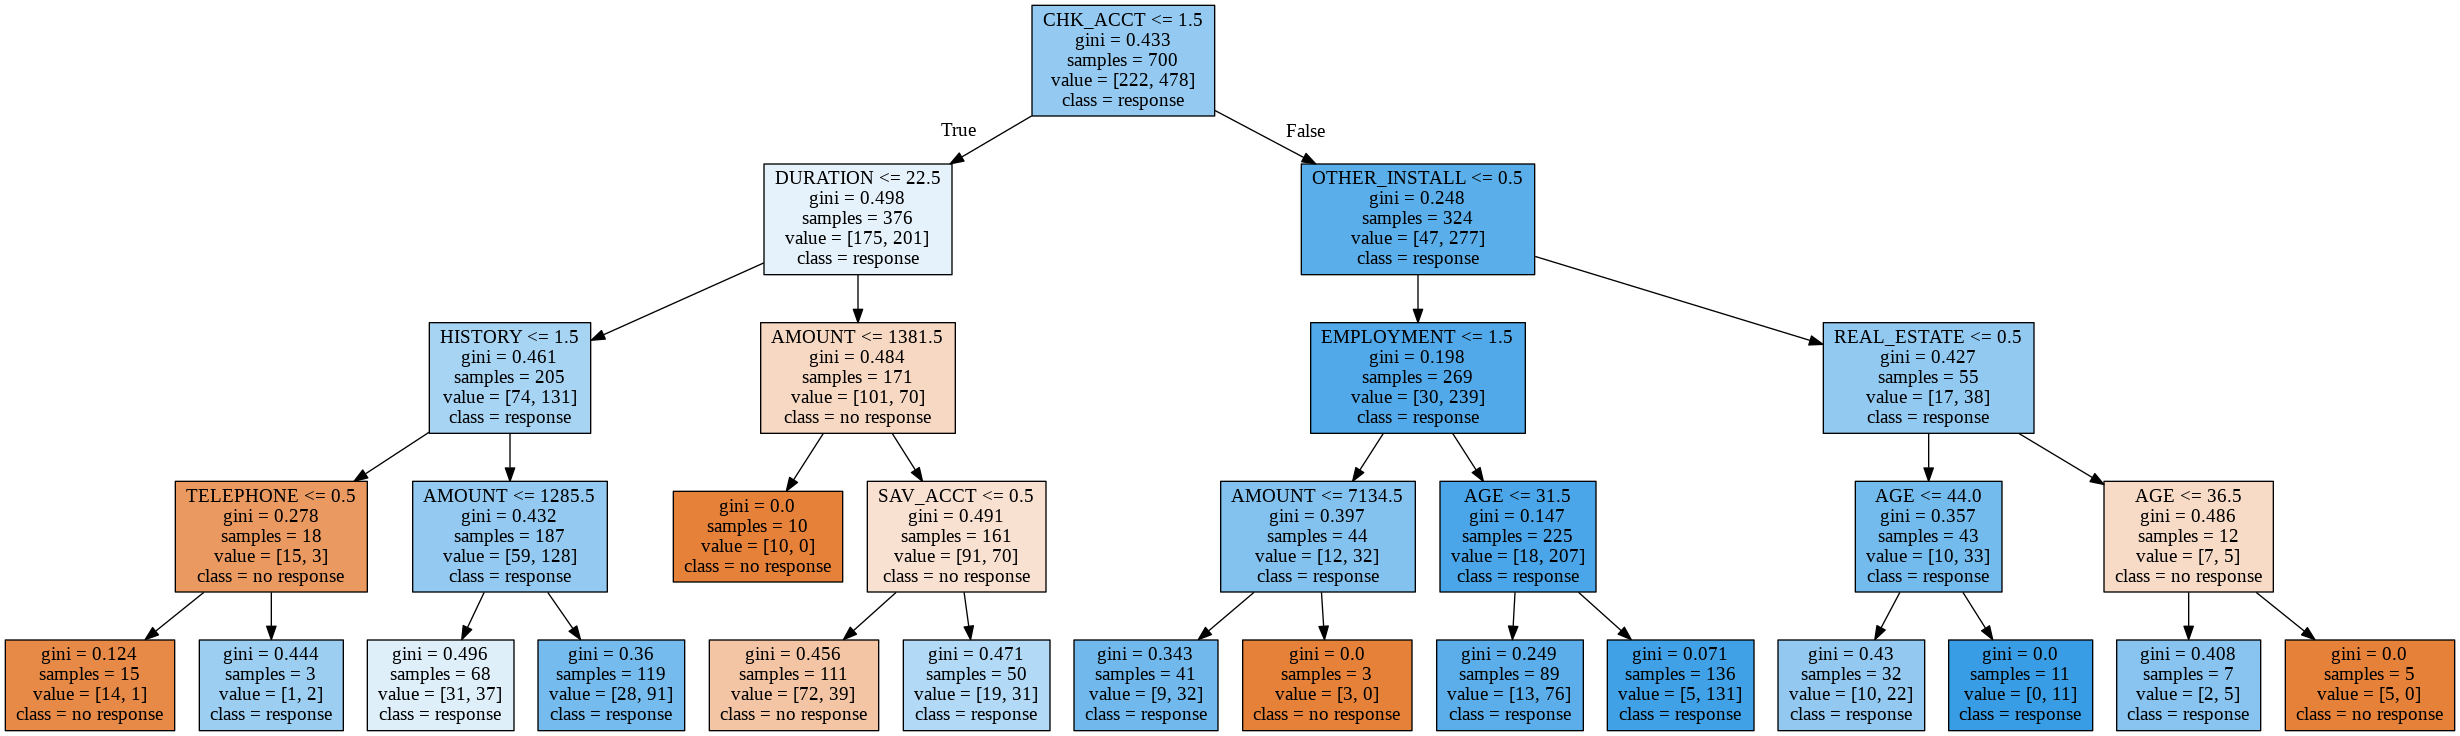

In [27]:
#Define Decision tree classifier with some default parameters
clf = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=4, min_samples_leaf=3)

#Fit the training data 
clf.fit(X_train, y_train)

#Use classifier to predict labels
y_pred = clf.predict(X_test)

'''
The graphviz library is used to visualize the tree. 
'''

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=['no response', 'response'], filled=True) #or use y_train.unique()

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PNG 
#graph.write_png("clf.png") #uncomment this line to save the plot as a .png file

## Rebalancing with SMOTE

In [19]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train) #ONLY APPLIED TO TRAINING!!!

## Build a balanced Decision Tree model

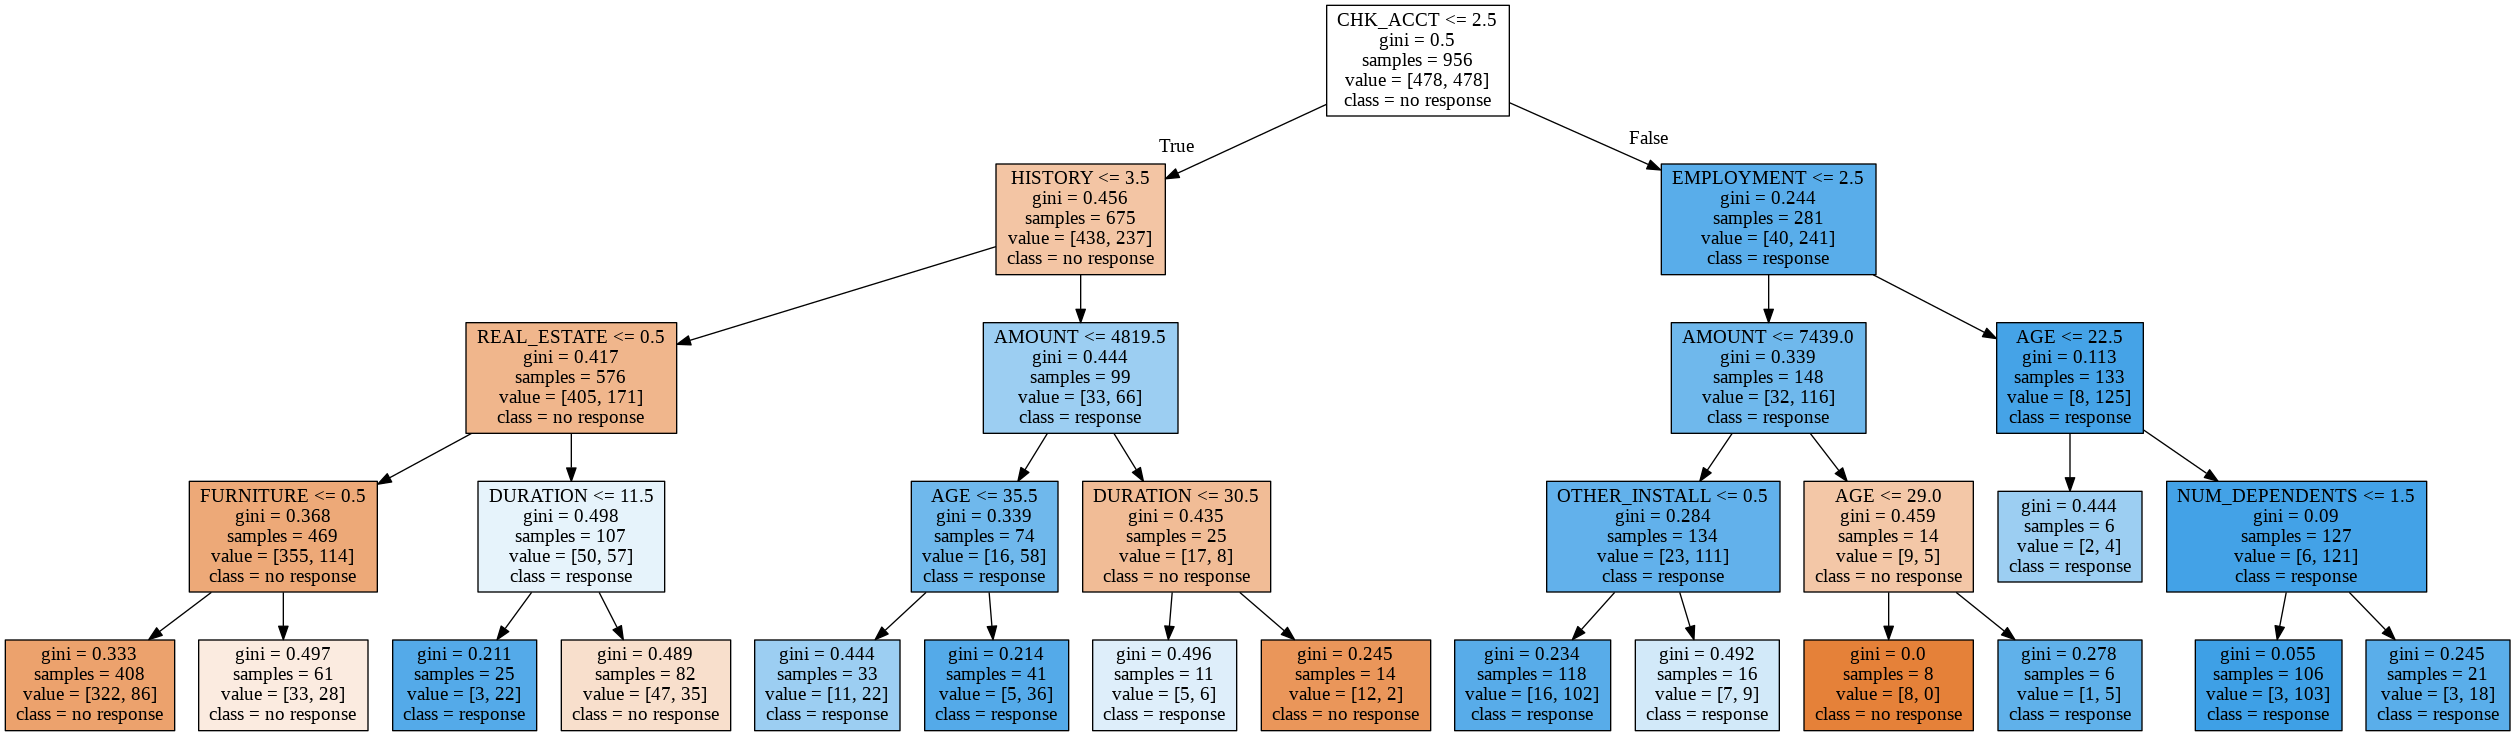

In [28]:
#Define Decision tree classifier with some default parameters
clf_sm = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=4, min_samples_leaf=4)

#Fit the training data 
clf_sm.fit(X_sm, y_sm)

'''
The graphviz library is used to visualize the tree. 
'''

# Create DOT data
dot_data = tree.export_graphviz(clf_sm, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=['no response', 'response'], filled=True) #or use y_sm.unique()

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PNG 
#graph.write_png("clf_sm.png") #uncomment this line to save the plot as a .png file

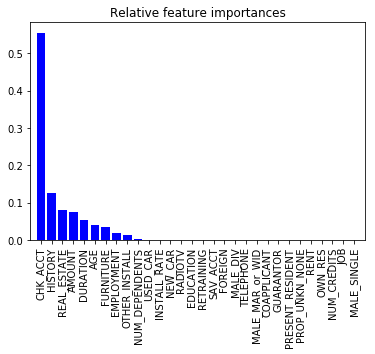

In [29]:
importances = clf_sm.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]

# Print the feature ranking
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b",  align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## Model evaluation

### 1. Confusion Matrix
### 2. ROC and AUC
### 3. Expected value framework (Excel)

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

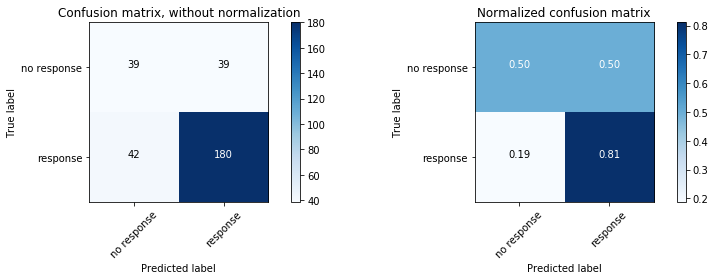

In [25]:
# Compute confusion matrix
class_names = ['no response', 'response']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()